In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import warnings
warnings.filterwarnings("ignore")

In [2]:
aad = pd.read_csv(r'C:\Users\rober\Documents\Data Science\Code (all)\Portfolio\DIY projects\Datasets\aa_dataset-tickets-multi-lang-5-2-50-version.csv') # Load the dataset

In [3]:
aad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28587 entries, 0 to 28586
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   subject   24749 non-null  object
 1   body      28587 non-null  object
 2   answer    28580 non-null  object
 3   type      28587 non-null  object
 4   queue     28587 non-null  object
 5   priority  28587 non-null  object
 6   language  28587 non-null  object
 7   version   28587 non-null  int64 
 8   tag_1     28587 non-null  object
 9   tag_2     28574 non-null  object
 10  tag_3     28451 non-null  object
 11  tag_4     25529 non-null  object
 12  tag_5     14545 non-null  object
 13  tag_6     5874 non-null   object
 14  tag_7     2040 non-null   object
 15  tag_8     565 non-null    object
dtypes: int64(1), object(15)
memory usage: 3.5+ MB


In [4]:
aad.duplicated().sum()

np.int64(0)

In [5]:
aad.head()

,subject,body,answer,type,queue,priority,language,version,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
0,Wesentlicher Sicherheitsvorfall,"Sehr geehrtes Support-Team,\n\nich möchte eine...",Vielen Dank für die Meldung des kritischen Sic...,Incident,Technical Support,high,de,51,Security,Outage,Disruption,Data Breach,NaN,NaN,NaN,NaN
1,Account Disruption,"Dear Customer Support Team,\n\nI am writing to...","Thank you for reaching out, <name>. We are awa...",Incident,Technical Support,high,en,51,Account,Disruption,Outage,IT,Tech Support,NaN,NaN,NaN
2,Query About Smart Home System Integration Feat...,"Dear Customer Support Team,\n\nI hope this mes...",Thank you for your inquiry. Our products suppo...,Request,Returns and Exchanges,medium,en,51,Product,Feature,Tech Support,NaN,NaN,NaN,NaN,NaN
3,Inquiry Regarding Invoice Details,"Dear Customer Support Team,\n\nI hope this mes...",We appreciate you reaching out with your billi...,Request,Billing and Payments,low,en,51,Billing,Payment,Account,Documentation,Feedback,NaN,NaN,NaN
4,Question About Marketing Agency Software Compa...,"Dear Support Team,\n\nI hope this message reac...",Thank you for your inquiry. Our product suppor...,Problem,Sales and Pre-Sales,medium,en,51,Product,Feature,Feedback,Tech Support,NaN,NaN,NaN,NaN


In [6]:
aad.type.value_counts()

type
Incident    11466
Request      8187
Problem      6012
Change       2922
Name: count, dtype: int64

In [7]:
aad['type'] = aad['type'].replace({'Incident':1, 'Request':2, 'Problem':3, 'Change':4})

In [8]:
aad.queue.value_counts()

queue
Technical Support                  8362
Product Support                    5252
Customer Service                   4268
IT Support                         3433
Billing and Payments               2788
Returns and Exchanges              1437
Service Outages and Maintenance    1148
Sales and Pre-Sales                 918
Human Resources                     576
General Inquiry                     405
Name: count, dtype: int64

In [9]:
aad['queue'] = aad['queue'].replace({'Technical Support':1, 'Product Support': 2, 'Customer Service':3,
                                     'IT Support': 4, 'Billing and Payments': 5,
                                     'Returns and Exchanges': 6, 'Service Outages and Maintenance': 7,
                                     'Sales and Pre-Sales': 8, 'Human Resources': 9,
                                     'General Inquiry':10})

In [10]:
aad.priority.value_counts()

priority
medium    11515
high      11178
low        5894
Name: count, dtype: int64

In [11]:
aad['priority'] = aad['priority'].replace({'low':1, 'medium':2, 'high':3})

In [12]:
aad.language.value_counts()

language
en    16338
de    12249
Name: count, dtype: int64

In [13]:
aad['language'] = aad['language'].replace({'en':1,'de':2})

In [14]:
tags = aad[['tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5', 'tag_6', 'tag_7', 'tag_8']]
print (tags.head())

      tag_1       tag_2         tag_3          tag_4         tag_5 tag_6  \
0  Security      Outage    Disruption    Data Breach           NaN   NaN   
1   Account  Disruption        Outage             IT  Tech Support   NaN   
2   Product     Feature  Tech Support            NaN           NaN   NaN   
3   Billing     Payment       Account  Documentation      Feedback   NaN   
4   Product     Feature      Feedback   Tech Support           NaN   NaN   

  tag_7 tag_8  
0   NaN   NaN  
1   NaN   NaN  
2   NaN   NaN  
3   NaN   NaN  
4   NaN   NaN  


In [15]:
for i in tags:
    print (f"\n{i} value counts:")
    print (tags[i].value_counts())
    print ('-'*30)


tag_1 value counts:
tag_1
Security          5880
Bug               5337
Feedback          3557
Feature           3081
Performance       3065
                  ... 
Recovery             1
Shipping             1
Employee             1
Infrastructure       1
Warranty             1
Name: count, Length: 116, dtype: int64
------------------------------

tag_2 value counts:
tag_2
Performance       5903
IT                2697
Documentation     1970
Disruption        1850
Sales             1516
                  ... 
Authentication       1
Adjustment           1
Data Loss            1
Delay                1
Technical            1
Name: count, Length: 256, dtype: int64
------------------------------

tag_3 value counts:
tag_3
IT                    6121
Tech Support          2635
Performance           2611
Disruption            1877
Documentation         1610
                      ... 
Query Optimization       1
Consultation             1
Data Leakage             1
Query                    1
War

In [16]:
# Apply get_dummies to all tag columns at once
tag_dummies = pd.get_dummies(aad[['tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5', 'tag_6', 'tag_7', 'tag_8']])
aad = pd.concat([aad.drop(['tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5', 'tag_6', 'tag_7', 'tag_8'], axis=1), tag_dummies], axis=1)

In [17]:
aad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28587 entries, 0 to 28586
Columns: 3154 entries, subject to tag_8_Workflow
dtypes: bool(3146), int64(5), object(3)
memory usage: 87.5+ MB


In [18]:
aad.head()

,subject,body,answer,type,queue,priority,language,version,tag_1_API,tag_1_API Integration,...,tag_8_Urgent,tag_8_User Experience,tag_8_User Troubleshooting,tag_8_VR Headset,tag_8_Verification,tag_8_Visibility,tag_8_Vulnerability,tag_8_Website,tag_8_Wi-Fi,tag_8_Workflow
0,Wesentlicher Sicherheitsvorfall,"Sehr geehrtes Support-Team,\n\nich möchte eine...",Vielen Dank für die Meldung des kritischen Sic...,1,1,3,2,51,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Account Disruption,"Dear Customer Support Team,\n\nI am writing to...","Thank you for reaching out, <name>. We are awa...",1,1,3,1,51,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Query About Smart Home System Integration Feat...,"Dear Customer Support Team,\n\nI hope this mes...",Thank you for your inquiry. Our products suppo...,2,6,2,1,51,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Inquiry Regarding Invoice Details,"Dear Customer Support Team,\n\nI hope this mes...",We appreciate you reaching out with your billi...,2,5,1,1,51,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Question About Marketing Agency Software Compa...,"Dear Support Team,\n\nI hope this message reac...",Thank you for your inquiry. Our product suppor...,3,8,2,1,51,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
# Add Ticket # column with zero-padded sequential numbers
ticket_numbers = [f"{i:04d}" for i in range(1, len(aad) + 1)]

# Insert as the first column
aad.insert(0, 'Ticket #', ticket_numbers)

In [20]:
aad.head()

,Ticket #,subject,body,answer,type,queue,priority,language,version,tag_1_API,...,tag_8_Urgent,tag_8_User Experience,tag_8_User Troubleshooting,tag_8_VR Headset,tag_8_Verification,tag_8_Visibility,tag_8_Vulnerability,tag_8_Website,tag_8_Wi-Fi,tag_8_Workflow
0,0001,Wesentlicher Sicherheitsvorfall,"Sehr geehrtes Support-Team,\n\nich möchte eine...",Vielen Dank für die Meldung des kritischen Sic...,1,1,3,2,51,False,...,False,False,False,False,False,False,False,False,False,False
1,0002,Account Disruption,"Dear Customer Support Team,\n\nI am writing to...","Thank you for reaching out, <name>. We are awa...",1,1,3,1,51,False,...,False,False,False,False,False,False,False,False,False,False
2,0003,Query About Smart Home System Integration Feat...,"Dear Customer Support Team,\n\nI hope this mes...",Thank you for your inquiry. Our products suppo...,2,6,2,1,51,False,...,False,False,False,False,False,False,False,False,False,False
3,0004,Inquiry Regarding Invoice Details,"Dear Customer Support Team,\n\nI hope this mes...",We appreciate you reaching out with your billi...,2,5,1,1,51,False,...,False,False,False,False,False,False,False,False,False,False
4,0005,Question About Marketing Agency Software Compa...,"Dear Support Team,\n\nI hope this message reac...",Thank you for your inquiry. Our product suppor...,3,8,2,1,51,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
aad.drop(['subject', 'body', 'answer'], axis=1, inplace=True)

In [22]:
print(aad['type'].value_counts(normalize=True))

type
1    0.401091
2    0.286389
3    0.210305
4    0.102214
Name: proportion, dtype: float64


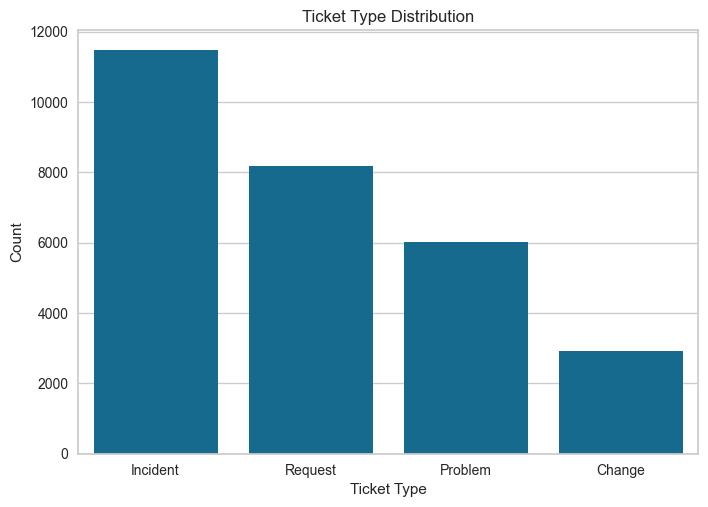

In [23]:
sns.countplot(data = aad, x='type')
plt.xticks([0,1,2,3], ['Incident', 'Request', 'Problem', 'Change'])
plt.title('Ticket Type Distribution')
plt.ylabel('Count')
plt.xlabel('Ticket Type')
plt.show()

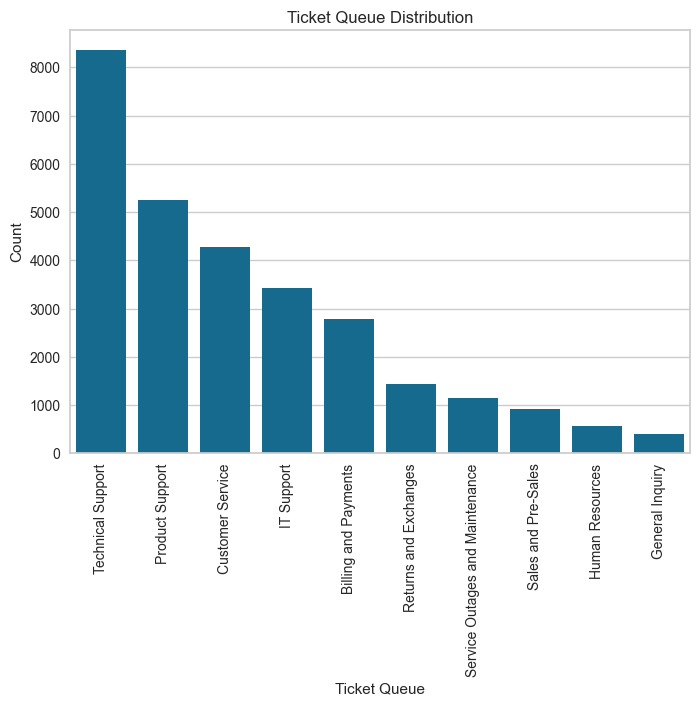

In [24]:
sns.countplot(data=aad, x='queue')
plt.xticks ([0,1,2,3,4,5,6,7,8,9], ['Technical Support', 'Product Support', 'Customer Service',
                                     'IT Support', 'Billing and Payments',
                                     'Returns and Exchanges', 'Service Outages and Maintenance',
                                     'Sales and Pre-Sales', 'Human Resources',
                                     'General Inquiry'])
plt.xticks(rotation=90)
plt.title ('Ticket Queue Distribution')
plt.ylabel('Count')
plt.xlabel('Ticket Queue')
plt.show()

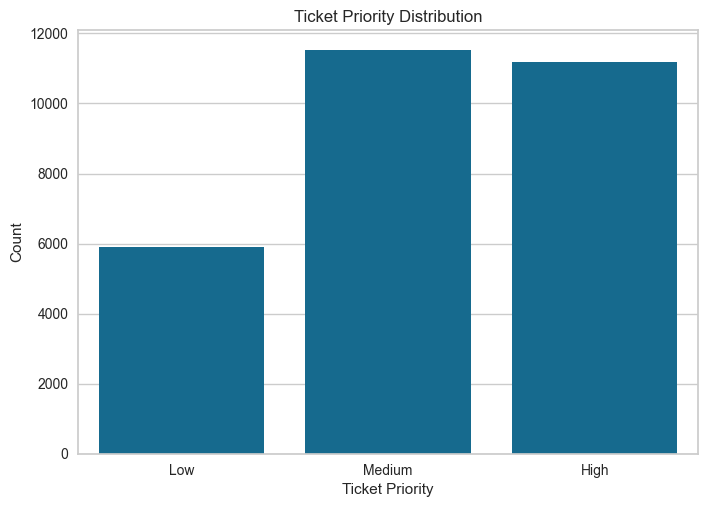

In [25]:
sns.countplot(data = aad, x='priority')
plt.xticks([0,1,2], ['Low', 'Medium', 'High'])
plt.xlabel('Ticket Priority')
plt.ylabel('Count')
plt.title('Ticket Priority Distribution')
plt.show()

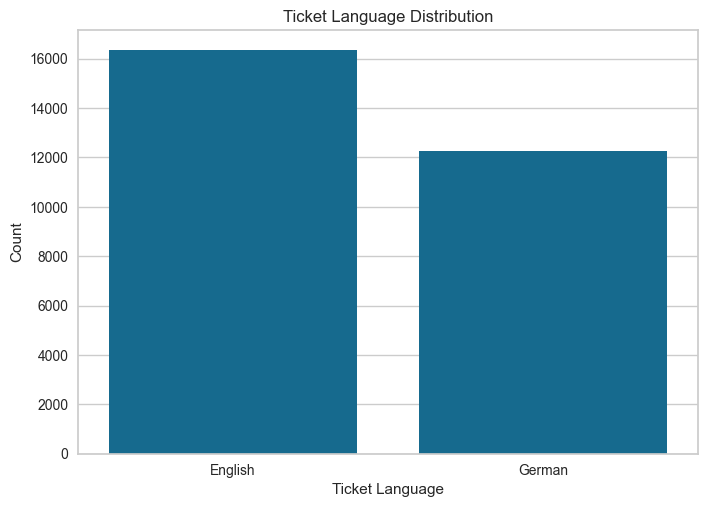

In [26]:
sns.countplot (data=aad, x='language')
plt.xticks([0,1], ['English', 'German'])
plt.title('Ticket Language Distribution')
plt.ylabel('Count')
plt.xlabel('Ticket Language')
plt.show()

In [27]:
aad['version'].value_counts()

version
400    18599
52      9119
51       869
Name: count, dtype: int64

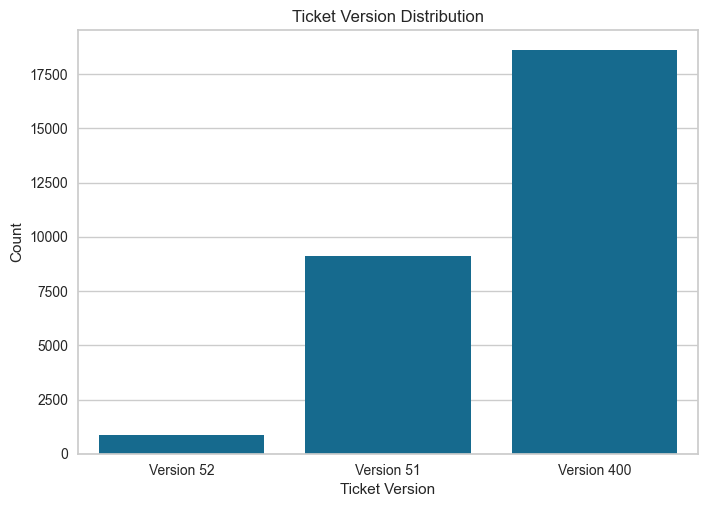

In [28]:
sns.countplot (data=aad, x='version')
plt.xticks([0,1,2], ['Version 52', 'Version 51', 'Version 400'])
plt.title('Ticket Version Distribution')
plt.ylabel('Count')
plt.xlabel('Ticket Version')
plt.show()

In [29]:
num_cols = aad.select_dtypes(include=[np.number]).columns.tolist()

In [30]:
num_cols_corr = aad[num_cols].corr()

<Axes: >

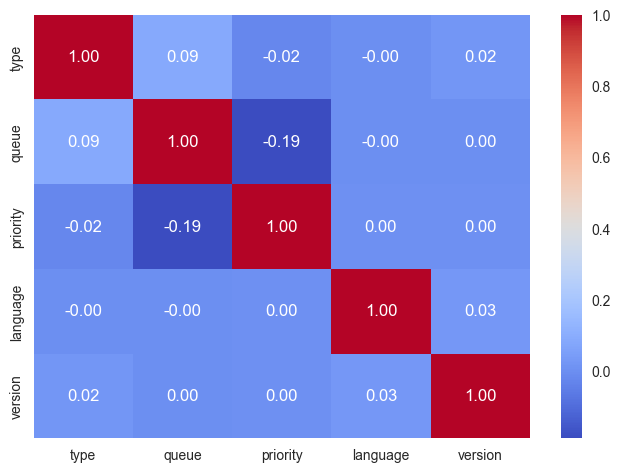

In [31]:
sns.heatmap(num_cols_corr, annot=True, cmap='coolwarm', fmt='.2f')

**OBSERVATIONS ON HEATMAP**

Not much to say here. Does not seem to be any correlation between any two combinations of categories.

**TO BE CONTINUED. Working on Cousera courses and will come back to this.**